<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Dynamic-Web-Content" data-toc-modified-id="Introduction-to-Dynamic-Web-Content-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Dynamic Web Content</a></span></li><li><span><a href="#Network-Sockets-and-Connections" data-toc-modified-id="Network-Sockets-and-Connections-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Network Sockets and Connections</a></span></li><li><span><a href="#HyperText-Transfer-Protocol" data-toc-modified-id="HyperText-Transfer-Protocol-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>HyperText Transfer Protocol</a></span></li><li><span><a href="#Building-a-Simple-Web-Browser-in-Python" data-toc-modified-id="Building-a-Simple-Web-Browser-in-Python-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building a Simple Web Browser in Python</a></span></li><li><span><a href="#Building-a-Simple-HTTP-Server-in-Python" data-toc-modified-id="Building-a-Simple-HTTP-Server-in-Python-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Building a Simple HTTP Server in Python</a></span></li></ul></div>

## Introduction to Dynamic Web Content

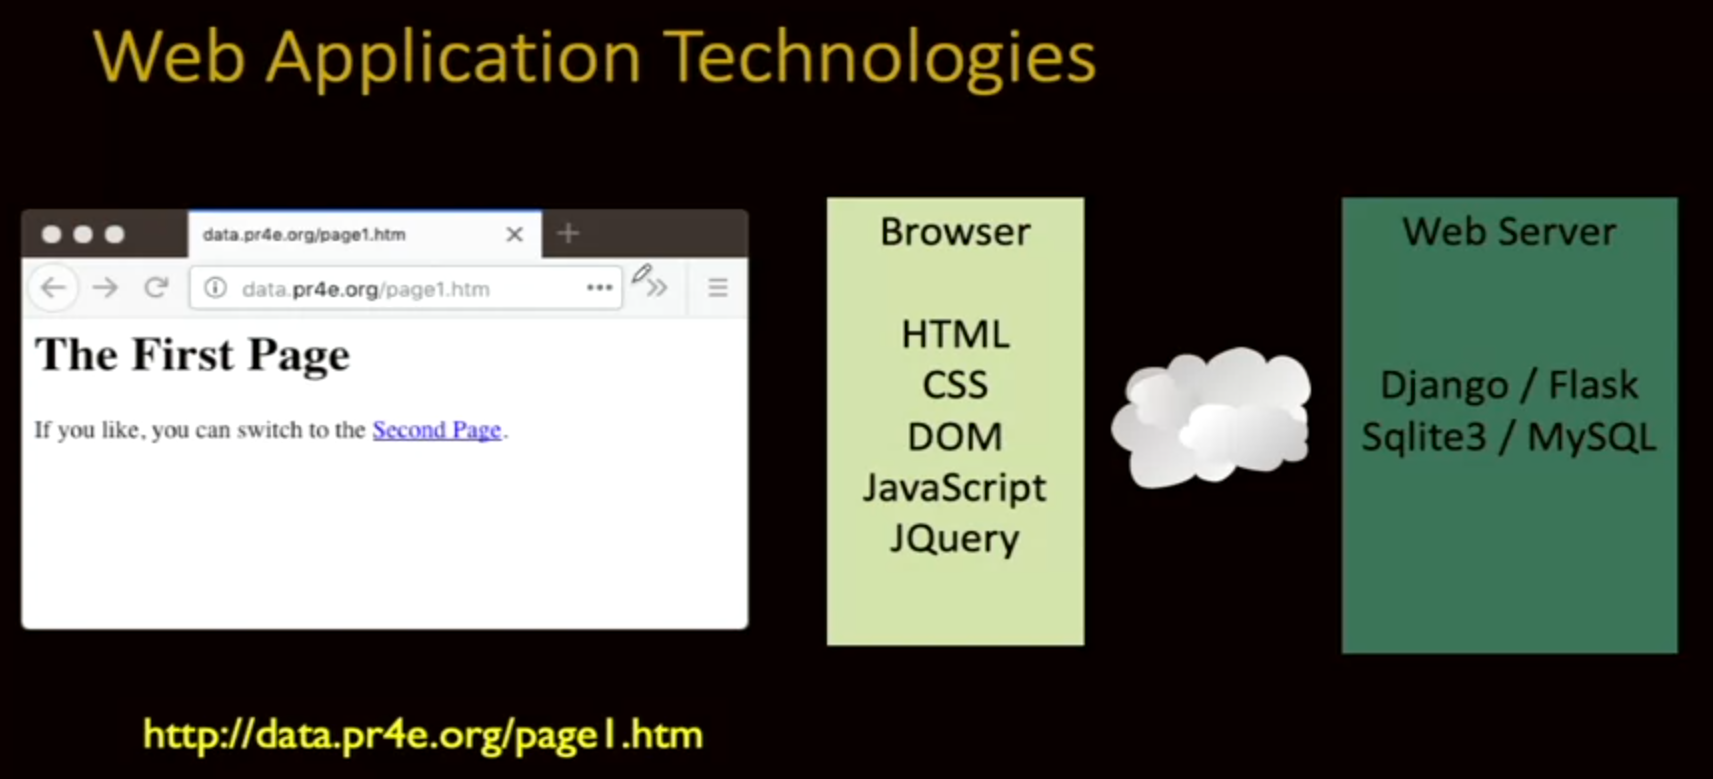

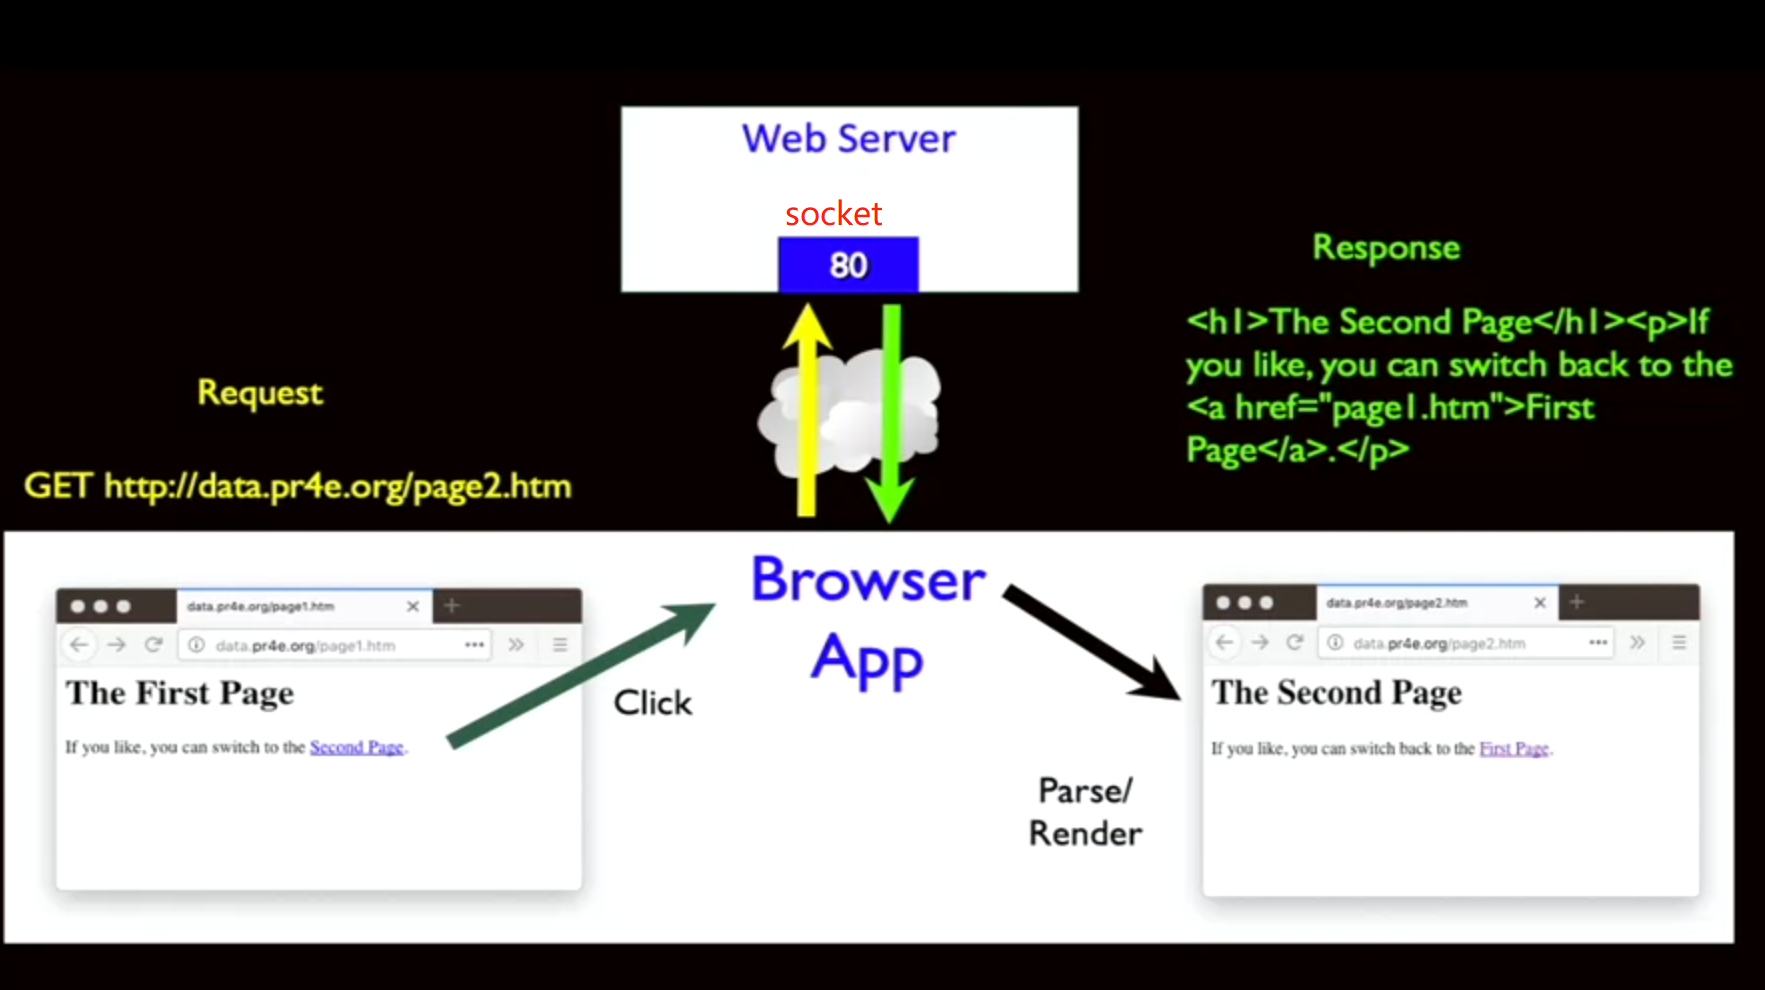

## Network Sockets and Connections

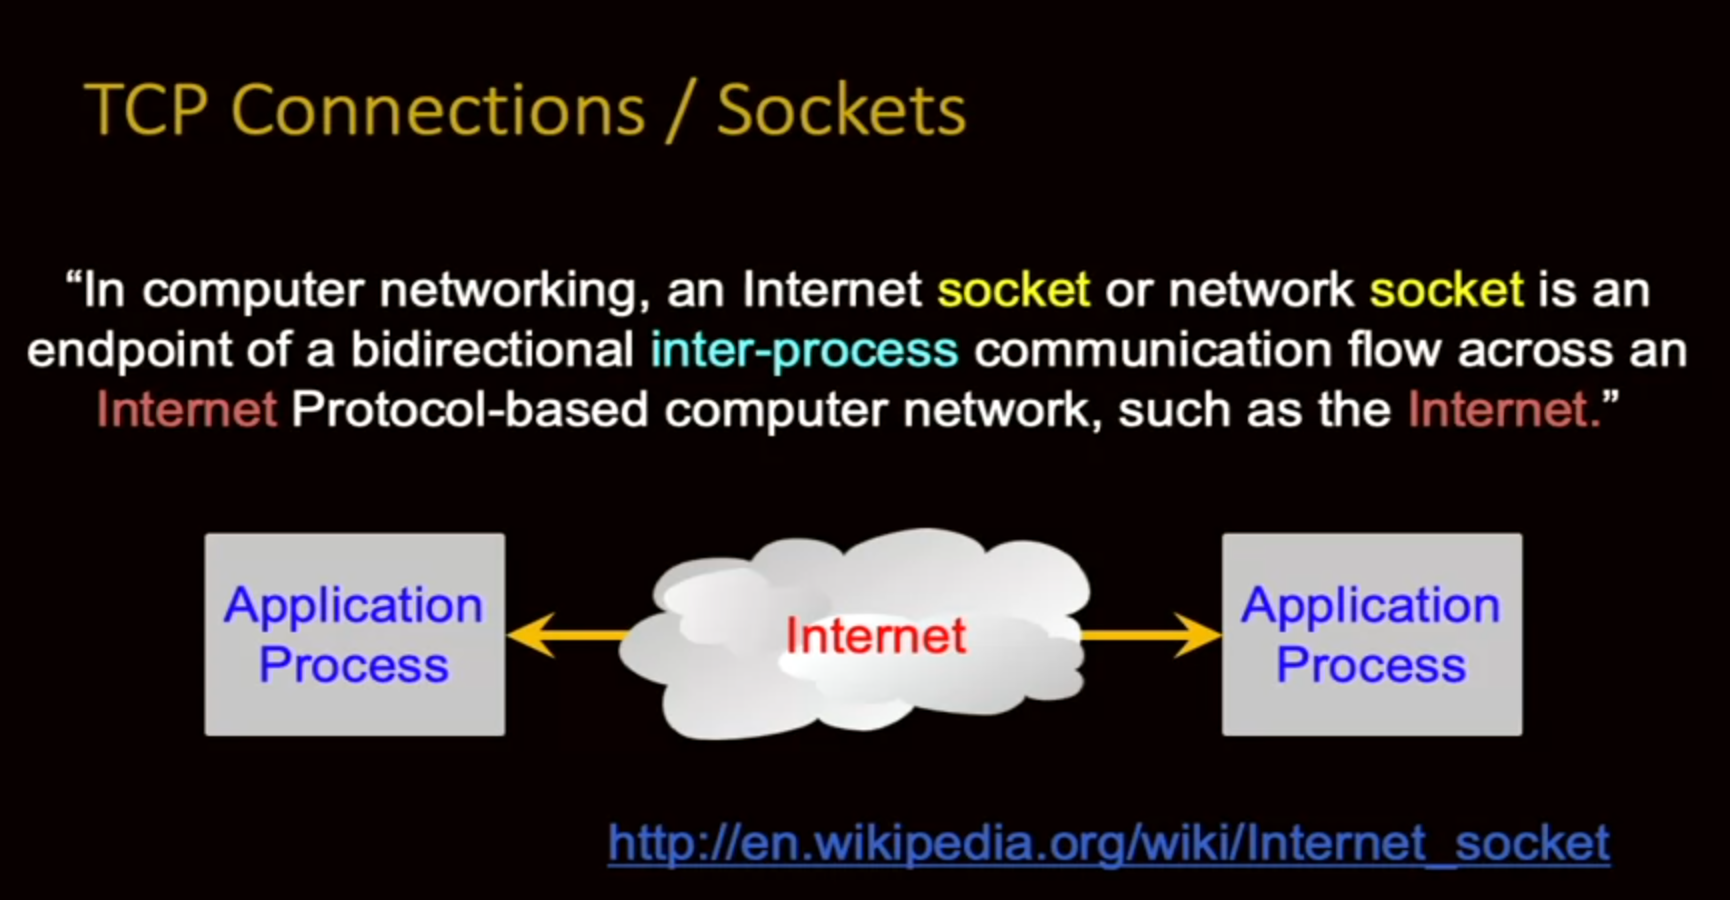

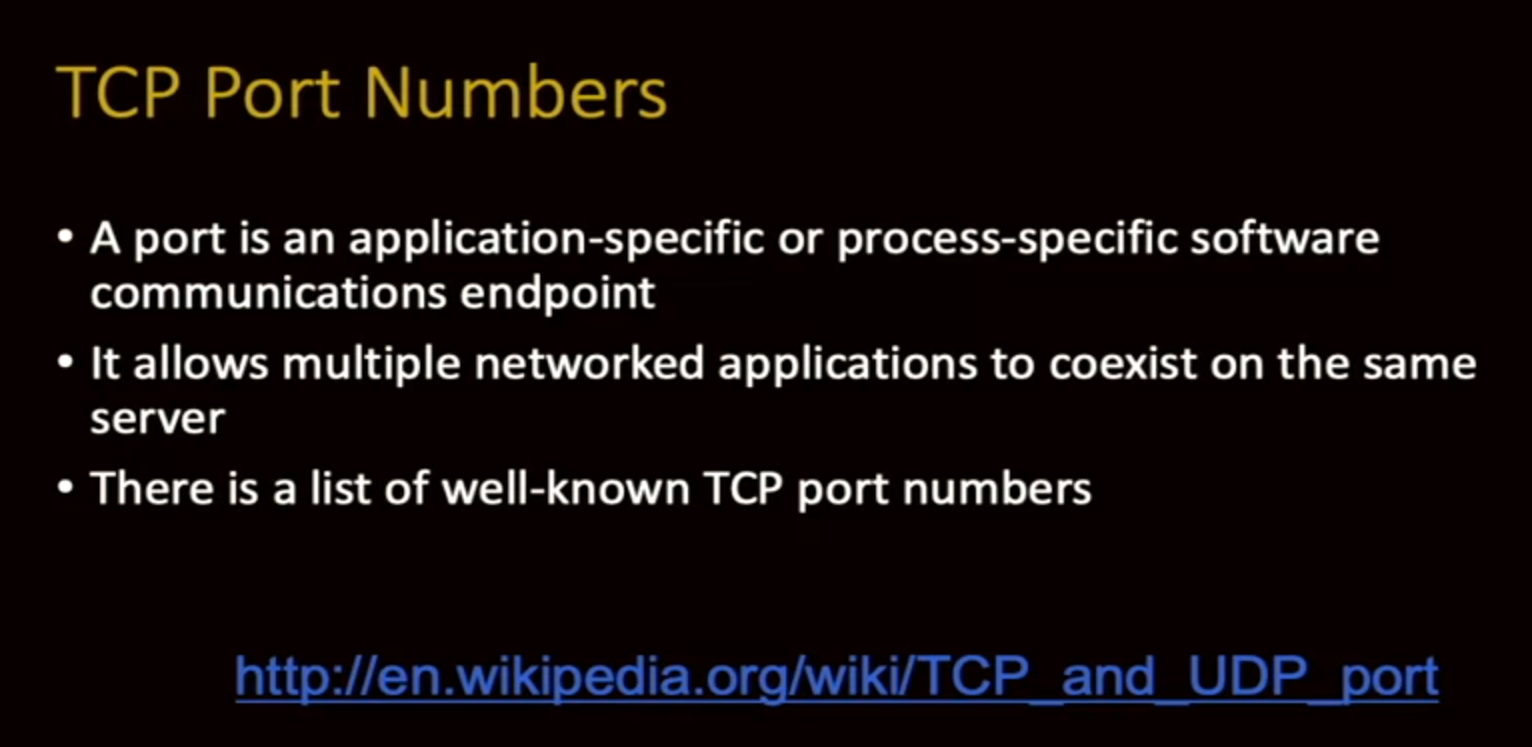

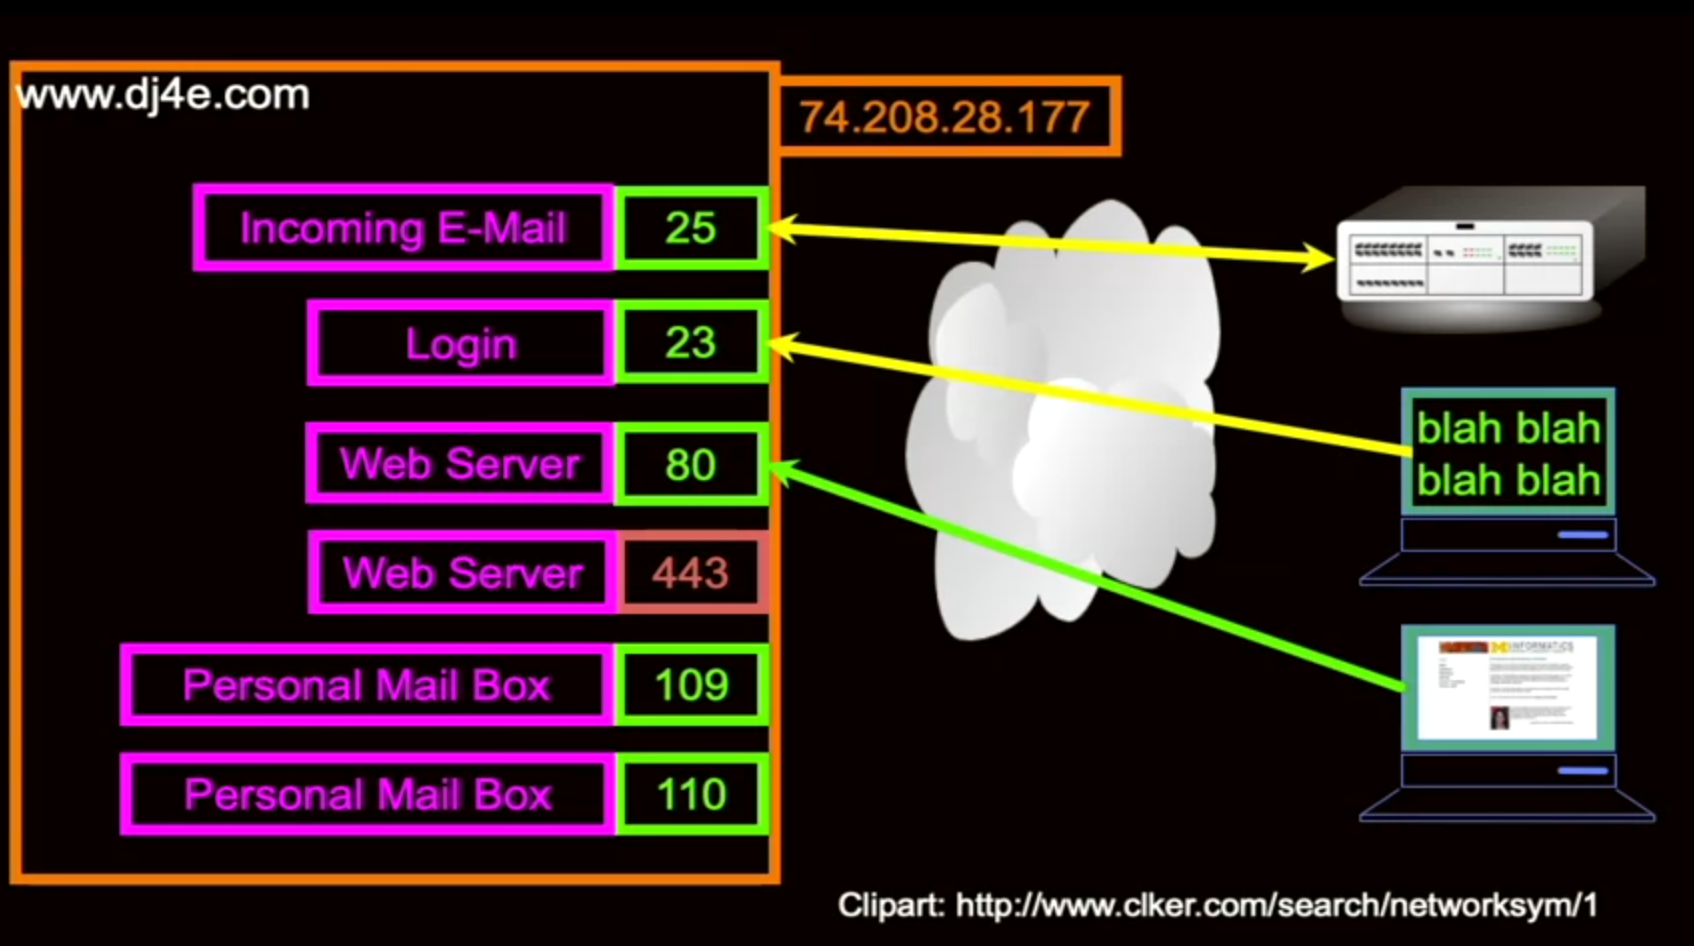

## HyperText Transfer Protocol

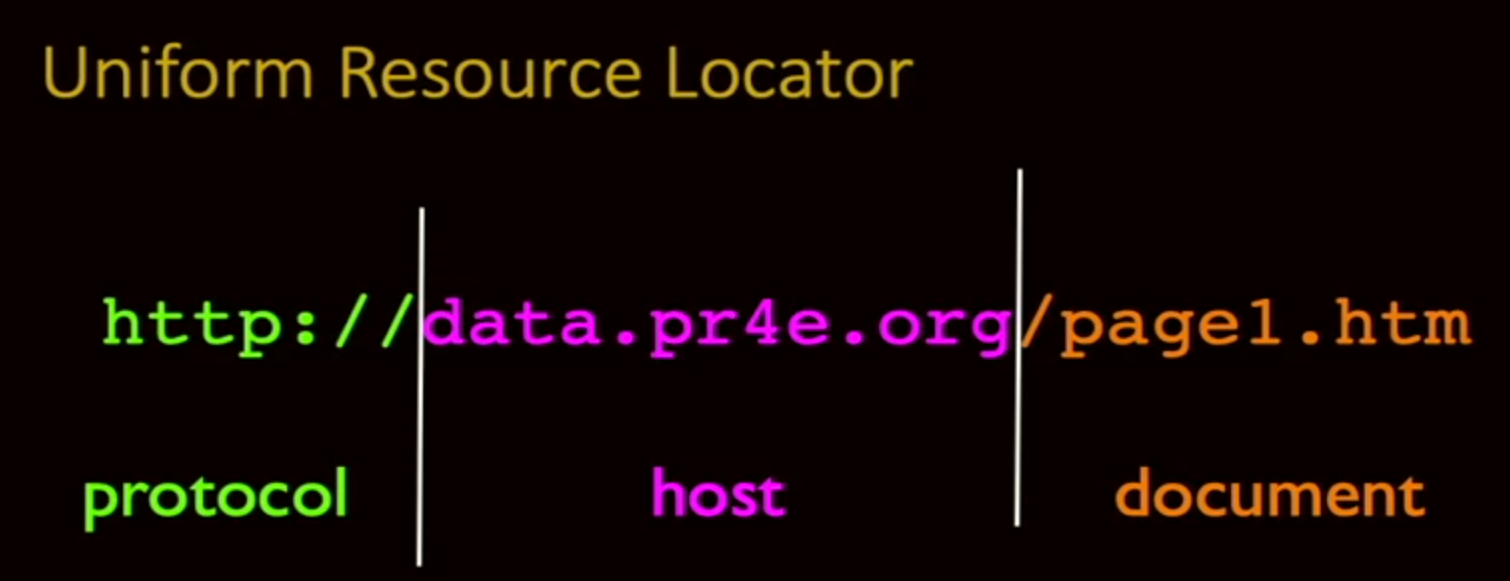

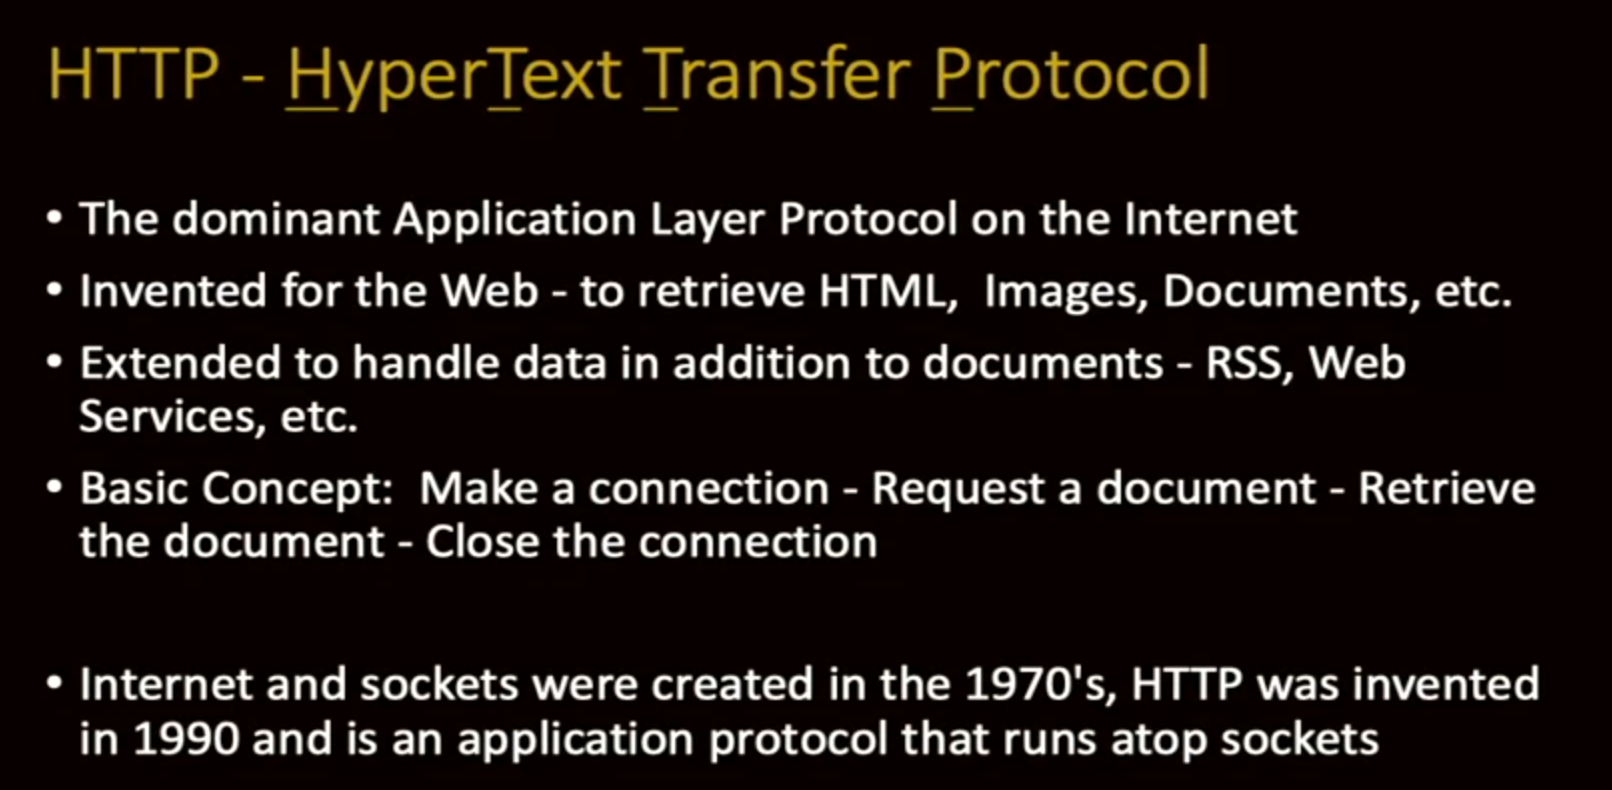

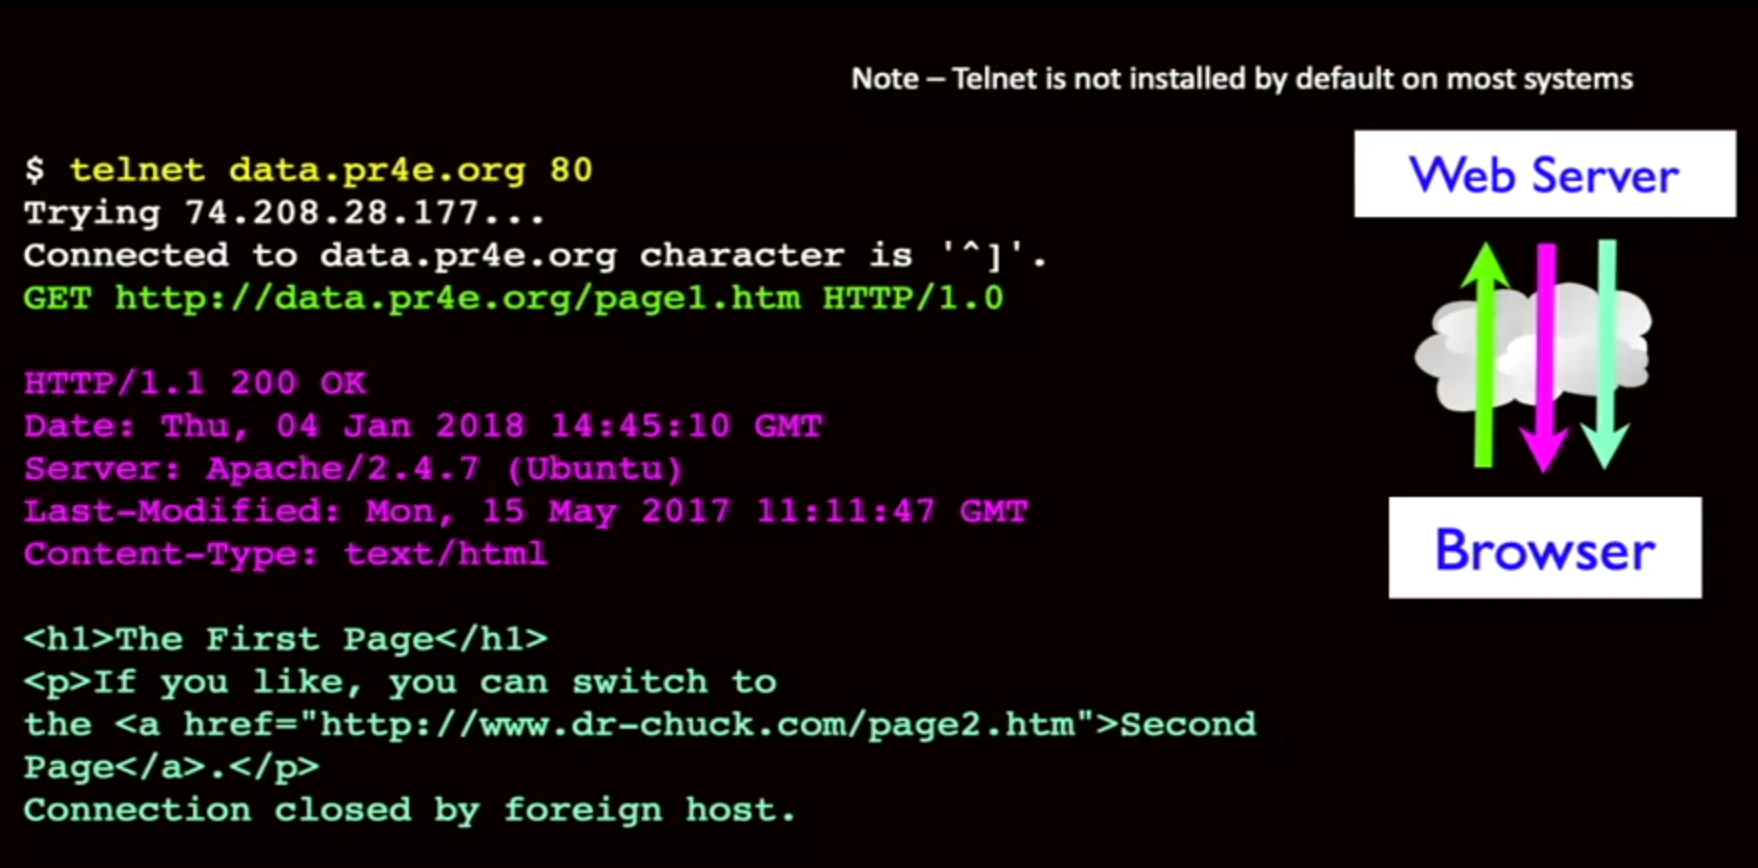

## Building a Simple Web Browser in Python

In [1]:
import socket

In [2]:
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org',80))
cmd = 'GET http://data.pr4e.org/page1.htm HTTP/1.0\r\n\r\n'.encode() # indicates no headers 
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end = '')

mysock.close()

HTTP/1.1 200 OK
Date: Wed, 30 Jun 2021 01:09:34 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Mon, 15 May 2017 11:11:47 GMT
ETag: "80-54f8e1f004857"
Accept-Ranges: bytes
Content-Length: 128
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/html

<h1>The First Page</h1>
<p>
If you like, you can switch to the 
<a href="http://data.pr4e.org/page2.htm">
Second Page</a>.
</p>


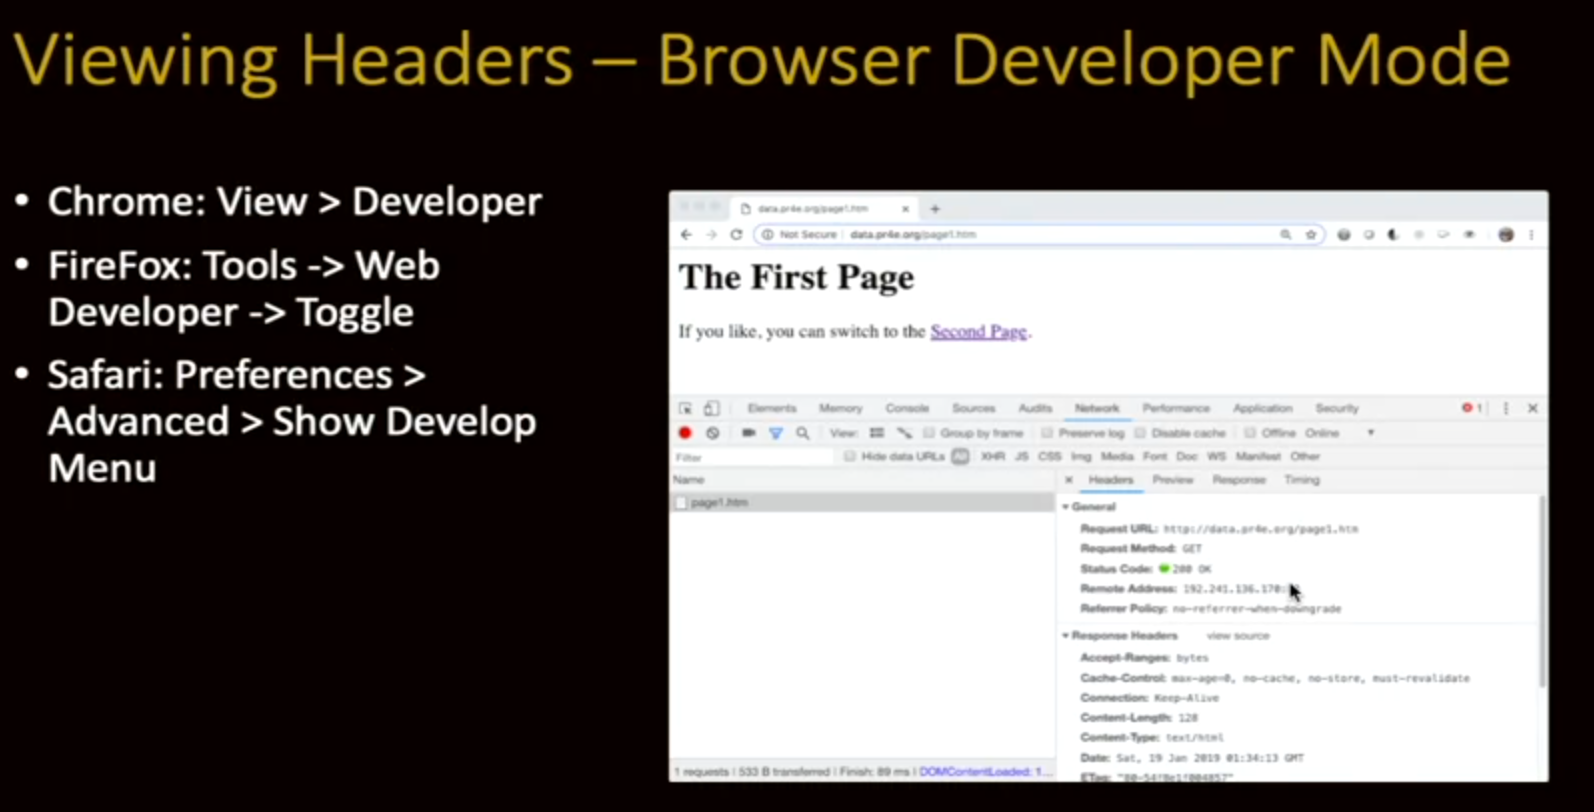

## Building a Simple HTTP Server in Python

In [ ]:
from socket import *

def createServer():
    serversocket = socket(AF_INET,SOCK_STREAM)
    try:
        serversocket.bind(('localhost',9000))
        serversocket.listen(5)
        while(1):
            (clientsocket,address) = serversocket.accept()

            rd = clientsocket.recv(5000).decode()
            pieces = rd.split('\n')
            if (len(pieces) > 0) : print(pieces[0])

            data = 'HTTP/1.1 200 OK \r\n'
            data += "Content-Type: text/html; charset=utf-8\r\n"
            data += '\r\n'
            data += '<html><body>Hello World</body></html>\r\n\r\n'
            clientsocket.sendall(data.encode())
            clientsocket.shutdown(SHUT_WR)
        
    except KeyboardInterrupt:
        print('\n Shutting down....\n')
    except Exception as e:
        print('Error')
        print(e)
        
    serversocket.close()
    
print('Access http://localhost:9000')
createServer()
               

Access http://localhost:9000
GET / HTTP/1.1
GET /favicon.ico HTTP/1.1

 Shutting down....

